In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('/Users/anshshah/Desktop/playground-series-s5e9/train.csv')
df.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [26]:
df.isna().sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

In [23]:
df.describe()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,262081.500000,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,151313.257586,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.000000,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,131040.750000,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,262081.500000,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,393122.250000,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,524163.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


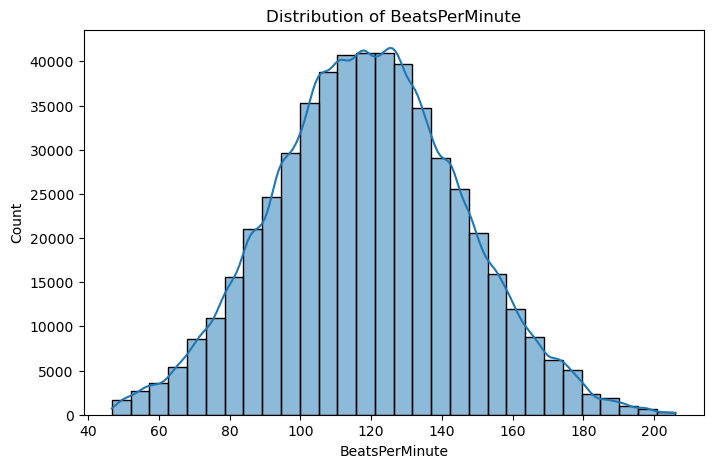

In [27]:
target = "BeatsPerMinute"

plt.figure(figsize=(8,5))
sns.histplot(df[target], kde=True, bins=30)
plt.title(f"Distribution of {target}")
plt.show()


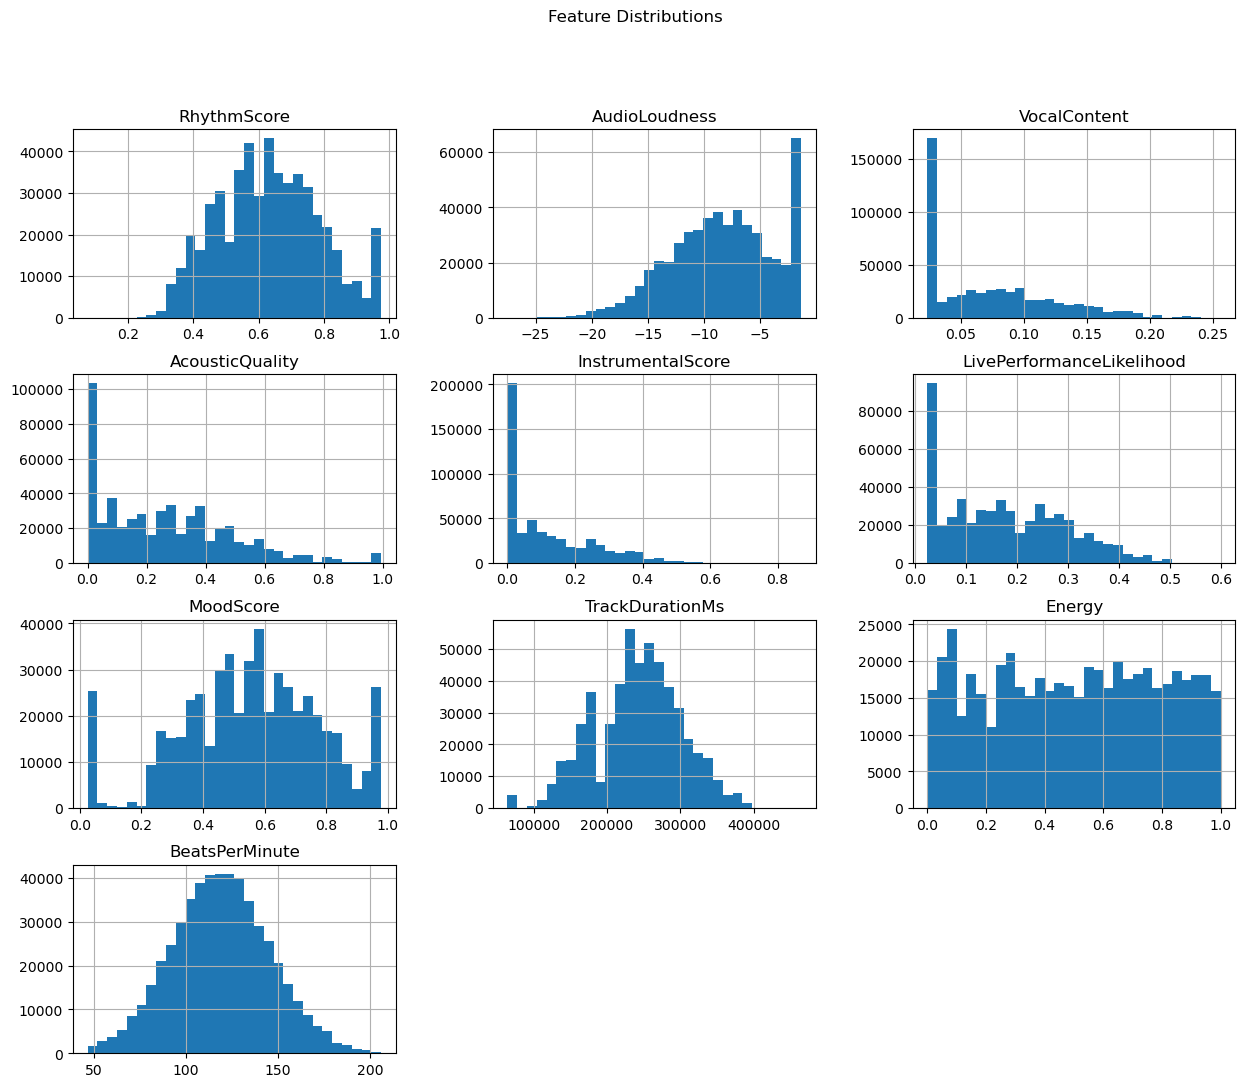

In [28]:
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
num_features.remove("id") # remove id if present

# Plot histograms for all numeric features
df[num_features].hist(bins=30, figsize=(15,12), layout=(4,3))
plt.suptitle("Feature Distributions")
plt.show()

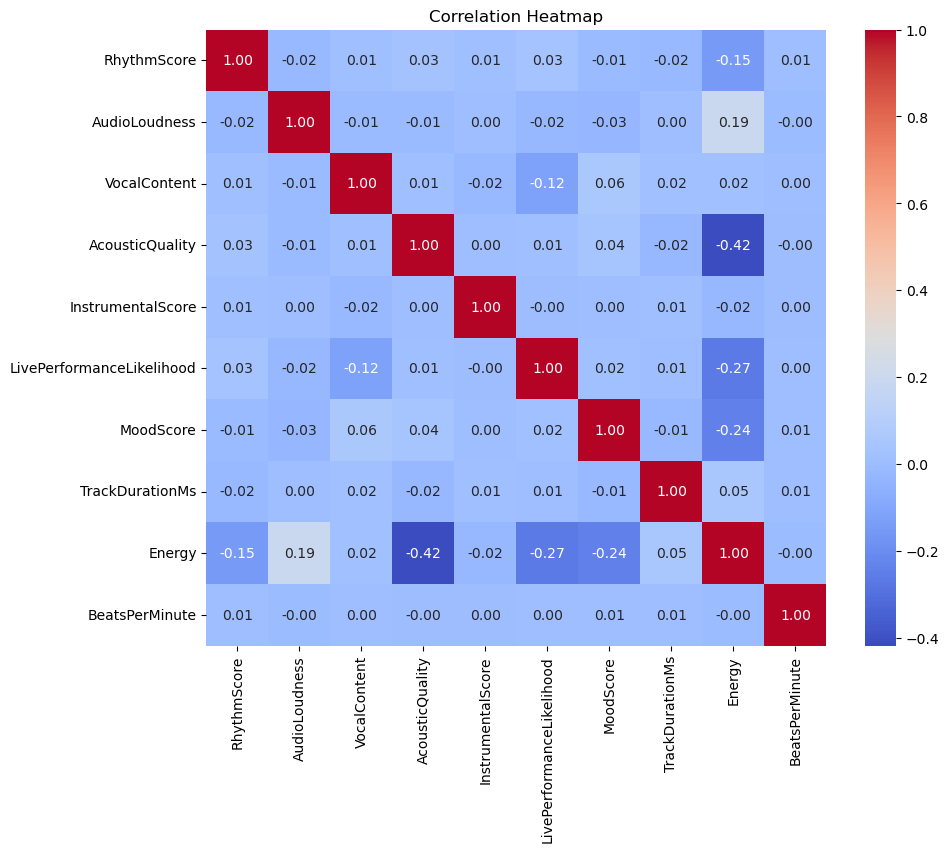


--- Correlation with Target ---
BeatsPerMinute               1.000000
MoodScore                    0.007059
TrackDurationMs              0.006637
RhythmScore                  0.005440
VocalContent                 0.004876
LivePerformanceLikelihood    0.003471
InstrumentalScore            0.001900
id                          -0.000355
AcousticQuality             -0.000820
AudioLoudness               -0.003327
Energy                      -0.004375
Name: BeatsPerMinute, dtype: float64


In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Correlation with target
print("\n--- Correlation with Target ---")
print(df.corr()[target].sort_values(ascending=False))

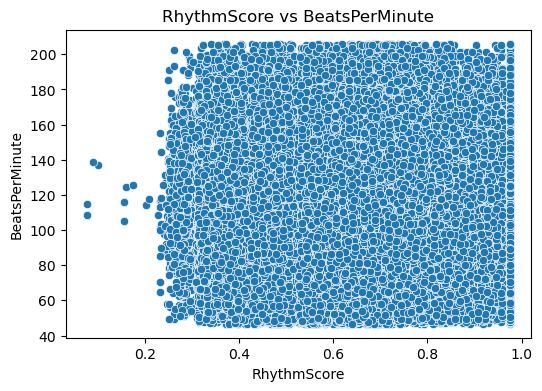

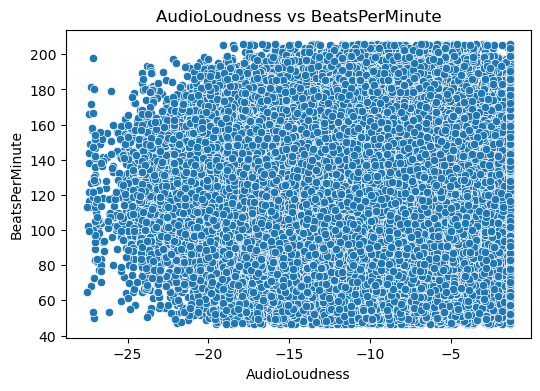

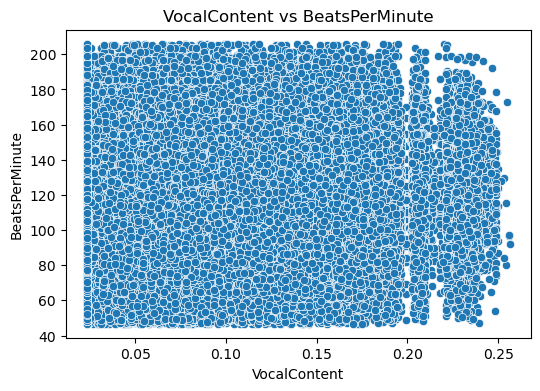

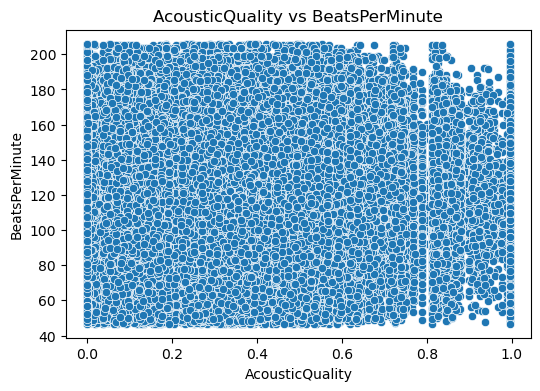

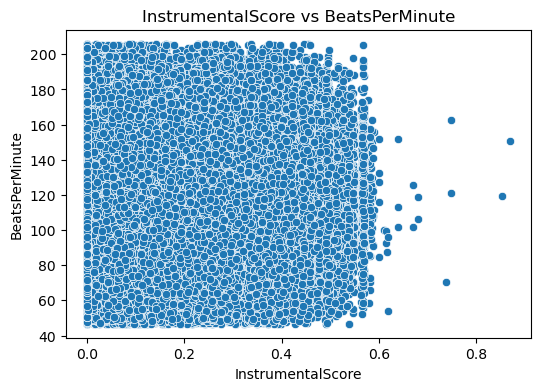

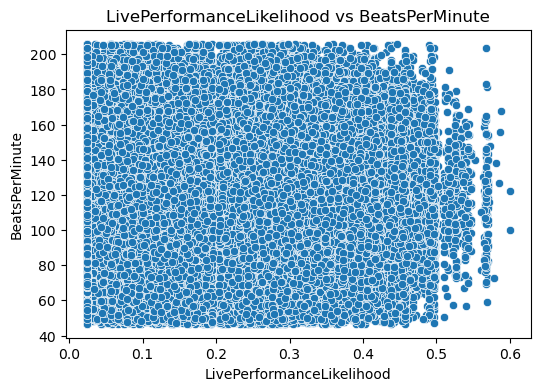

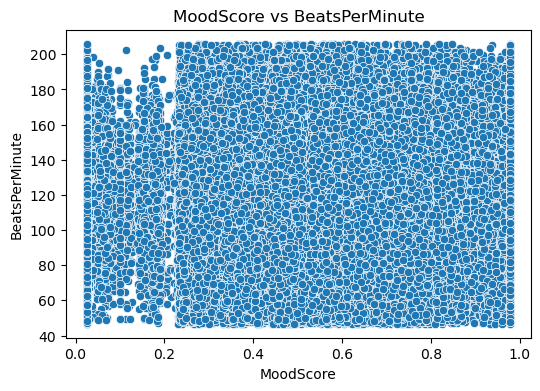

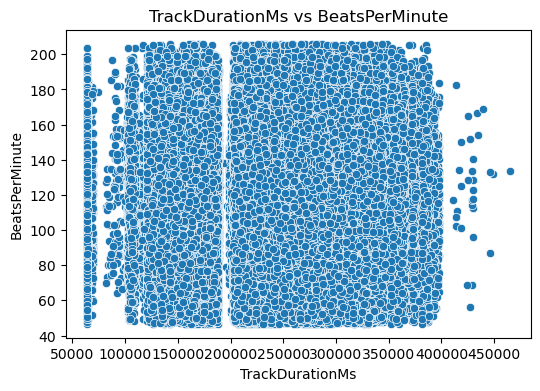

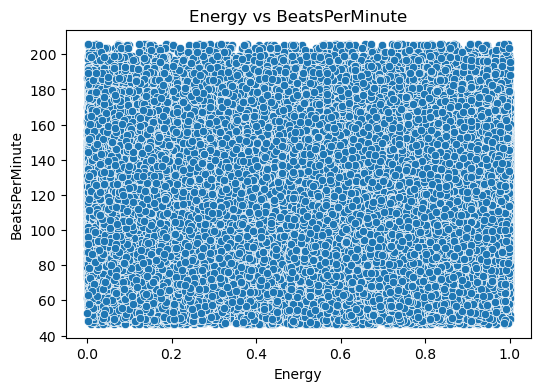

In [30]:
for col in num_features:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"{col} vs {target}")
        plt.show()

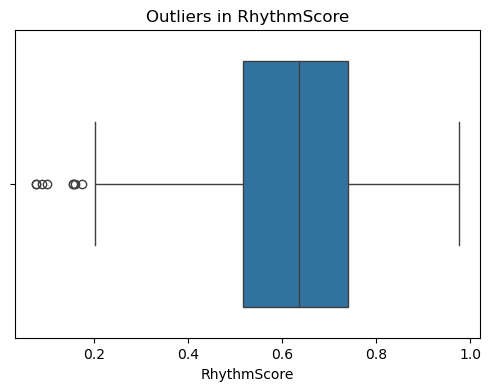

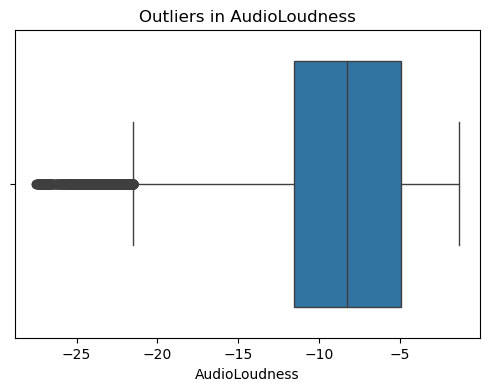

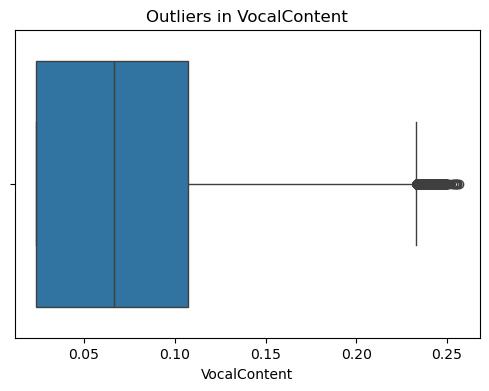

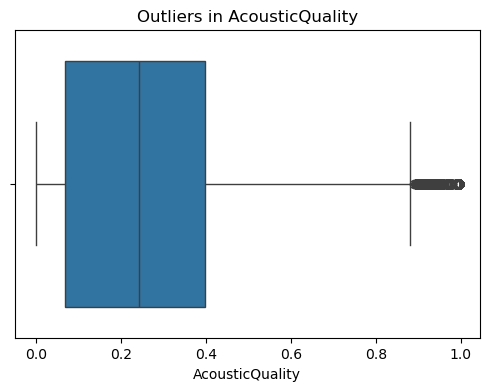

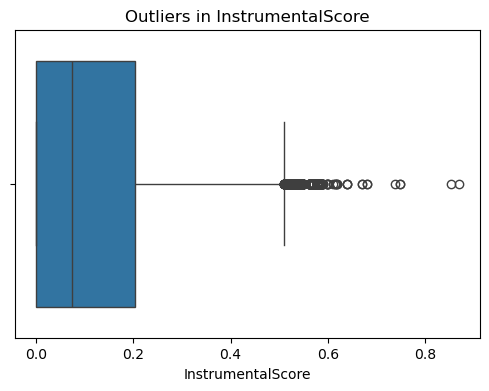

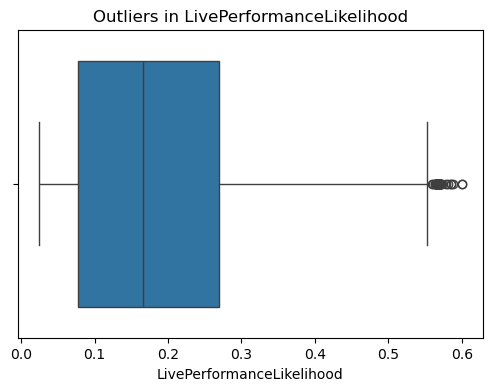

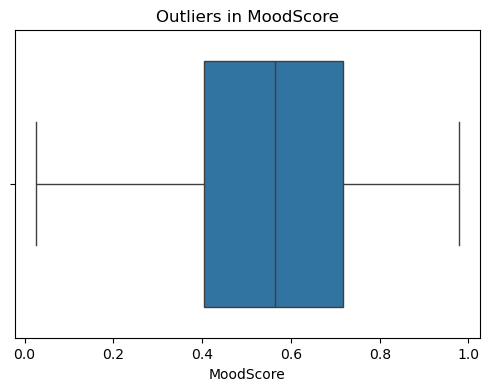

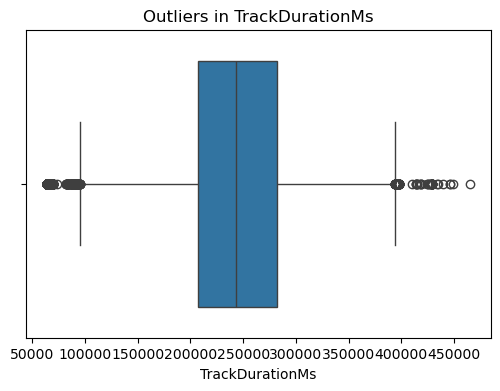

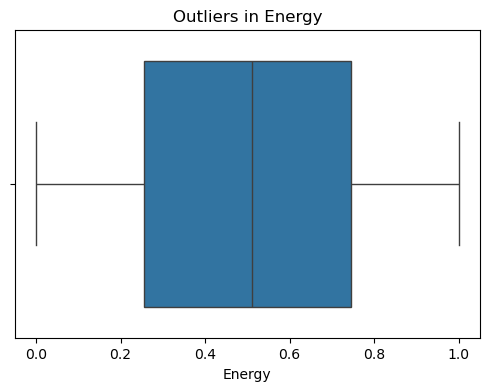

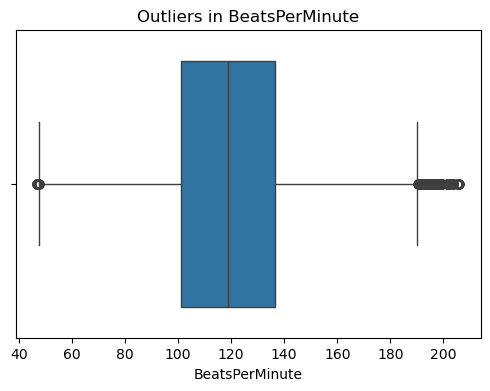

In [31]:
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [32]:
features = ['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality']

for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Winsorization (capping)
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

In [33]:
df['TrackDurationMin'] = df['TrackDurationMs'] / 60000
df['Energy_Acoustic_Ratio'] = df['Energy'] / (df['AcousticQuality'] + 1e-5)
df['Vocal_Instrument_Balance'] = df['VocalContent'] / (df['InstrumentalScore'] + 1e-5)
df['MoodRhythm'] = df['MoodScore'] * df['RhythmScore']
df['PerformanceIntensity'] = df['LivePerformanceLikelihood'] * df['AudioLoudness']
df['RhythmEnergy'] = df['RhythmScore'] * df['Energy']
df['MoodAcoustic'] = df['MoodScore'] * df['AcousticQuality']

In [34]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
X = df.drop(columns=['id', target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'max_depth': [3, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [200, 500],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

xgb = XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
estimator=xgb,
param_distributions=param_dist,
n_iter=20,
scoring='neg_mean_squared_error',
cv=3,
verbose=1,
n_jobs=-1,
random_state=42
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


python(90386) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(90388) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(90389) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(90390) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(90391) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(90392) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(90393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(90394) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(90395) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(90396) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Best parameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.7}


In [35]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 26.43994745901159
R² Score: 0.0003923204690758908


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


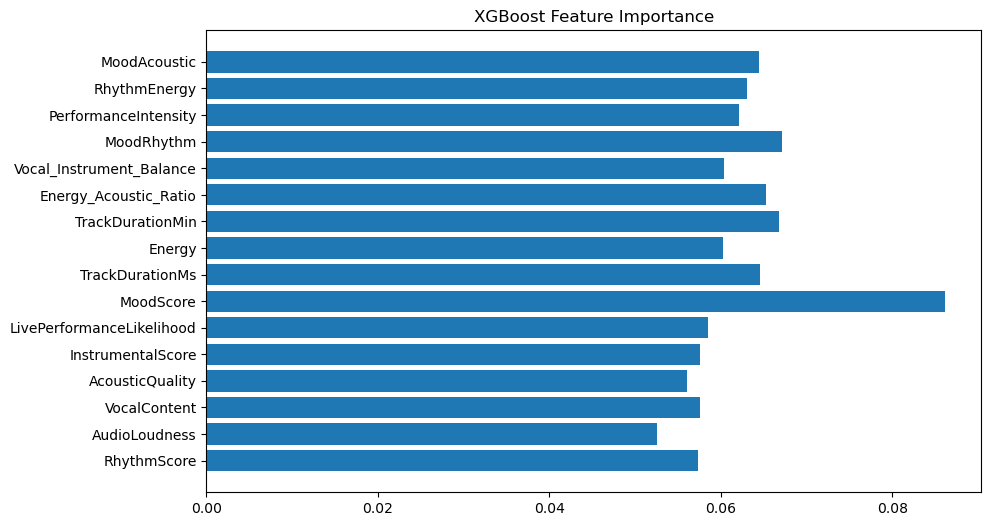

In [36]:
plt.figure(figsize=(10,6))
plt.barh(X.columns, best_model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.show()

In [37]:
test_df = pd.read_csv("/Users/anshshah/Desktop/playground-series-s5e9/test.csv")

# ========================
# 2. Apply Same Feature Engineering
# ========================
test_df['TrackDurationMin'] = test_df['TrackDurationMs'] / 60000
test_df['Energy_Acoustic_Ratio'] = test_df['Energy'] / (test_df['AcousticQuality'] + 1e-5)
test_df['Vocal_Instrument_Balance'] = test_df['VocalContent'] / (test_df['InstrumentalScore'] + 1e-5)
test_df['MoodRhythm'] = test_df['MoodScore'] * test_df['RhythmScore']
test_df['PerformanceIntensity'] = test_df['LivePerformanceLikelihood'] * test_df['AudioLoudness']
test_df['RhythmEnergy'] = test_df['RhythmScore'] * test_df['Energy']
test_df['MoodAcoustic'] = test_df['MoodScore'] * test_df['AcousticQuality']

# ========================
# 3. Ensure Consistent Features
# ========================
train_features = best_model.get_booster().feature_names  # features used in training

X_test_final = test_df[train_features]  # select only training features (drop id automatically)

y_pred_test = best_model.predict(X_test_final)

# ========================
# 5. Save Predictions
# ========================
output = pd.DataFrame({
    "id": test_df["id"],
    "Predicted_BPM": y_pred_test
})

output.to_csv("test_predictions.csv", index=False)

print("Predictions saved to test_predictions.csv")
print(output.head())

Predictions saved to test_predictions.csv
       id  Predicted_BPM
0  524164     118.929909
1  524165     118.890190
2  524166     118.880264
3  524167     119.276939
4  524168     119.397064
